<a href="https://colab.research.google.com/github/khaichiong/meco7312/blob/master/Lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2, uniform

# Sampling distribution of the sample mean

If we draw a sample of $n$ observations from a population with $\mathcal{N}(\mu, \sigma^{2})$, the sampling distribution of the sample mean is $\mathcal{N}(\mu,\sigma^2/n)$.

In [ ]:
n = 100 #sample size
s = 1000 #number of experiments
mu = 1
sd = 2
x = np.random.normal(mu,sd,(n,s))

In [ ]:
#take the sample mean of each experiment 
sample_means = np.mean(x,axis=0) 

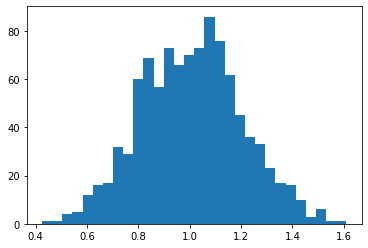

In [ ]:
plt.hist(sample_means,bins=30)
plt.show()

In [ ]:
#Theoretically the sampling distribution is N(mu,sigma^2/n)
print(np.mean(sample_means))
print(mu)
print(np.var(sample_means))
print((sd**2)/n)

1.0080195094600652
1
0.038479629345444424
0.04


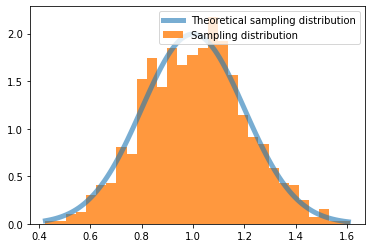

In [ ]:
#Compare with the theoretical sampling density
z = np.arange(min(sample_means),max(sample_means),0.01)
norm.pdf(z, mu, np.sqrt((sd**2)/n))
fig, ax = plt.subplots(1, 1)
ax.plot(z,norm.pdf(z, mu, np.sqrt((sd**2)/n)),lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(sample_means,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()

# Sampling distribution of the sample variance

In [ ]:
n = 20 #sample size
s = 1000 #number of experiments
mu = 1
sd = 2
x = np.random.normal(mu,sd,(n,s))

In [ ]:
#take the sample variance of each experiment 
sample_var = np.var(x,axis=0,ddof=1) 

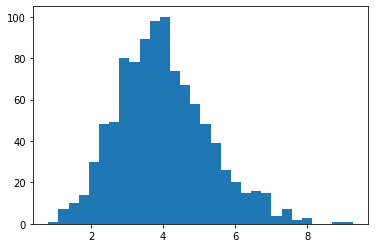

In [ ]:
plt.hist(sample_var,bins=30)
plt.show()

In [ ]:
normalized_sample_var = (n-1)*sample_var/sd**2

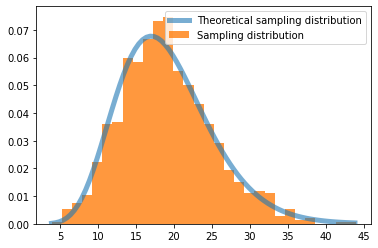

In [ ]:
#Theoretically the sampling distribution of the sample variance is Chi-squared with n-1 degrees of freedom
z = np.arange(np.min(normalized_sample_var),np.max(normalized_sample_var),0.5)
fig, ax = plt.subplots(1, 1)
ax.plot(z,chi2.pdf(z, n-1),lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(normalized_sample_var,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()

In [ ]:
#The mean of the sample variance should be sd^2
print(np.mean(sample_var))
print(sd**2)

4.011535962703311
4


In [ ]:
#The variance of the sample variance should be 2*sd^4/(n-1)
print(np.var(sample_var))
print((2*sd**4)/(n-1))

1.6320268773988458
1.6842105263157894


# Sampling distribution of the standardized mean

In [ ]:
n = 6 #sample size
s = 10000 #number of experiments
mu = 1
sd = 2
x = np.random.normal(mu,sd,(n,s))

In [ ]:
sample_means = np.mean(x,axis=0) 
sample_var = np.var(x,axis=0,ddof=1) 

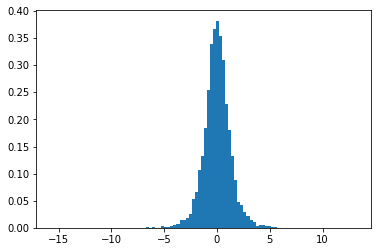

In [ ]:
standardized_means = (sample_means-mu)/(np.sqrt(sample_var/n))
plt.hist(standardized_means,bins=100,density=True)
plt.show()

Compare with Student-t distribution with n-1 degrees of freedom.

In [ ]:
print(np.mean(standardized_means))

0.009821763604948066


In [ ]:
print(np.var(standardized_means))
print((n-1)/(n-3))

1.6639905957618761
1.6666666666666667


# Order statistics

## Order statistics for the Uniform distribution

In [ ]:
n = 50
s = 10000
mu = 0
sd = 1
x = np.random.uniform(0,1,(n,s))
xn = np.max(x,axis=0)

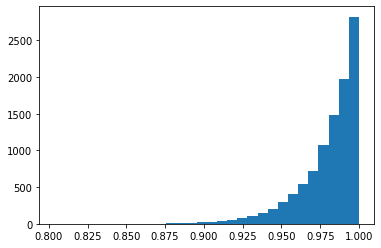

In [ ]:
plt.hist(xn,bins=30)
plt.show()

In [ ]:
#Compare with the theoretical pdf of largest order statistics
z = np.linspace(min(xn),max(xn),num = 200)
fx = n*(uniform.cdf(z,0,1)**(n-1))*uniform.pdf(z,0,1)

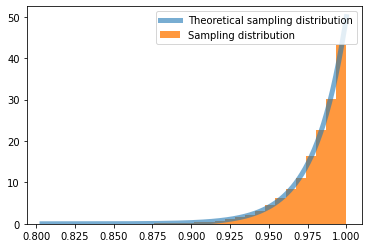

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(z,fx,lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(xn,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()

## Plot mean of largest order statistics as a function of sample size. Uniform distribution.

In [ ]:
def mean_largest_uniform(n):
  s = 10000
  mu = 0
  sd = 1
  x = np.random.uniform(0,1,(n,s))
  xn = np.max(x,axis=0)
  return np.mean(xn)

In [ ]:
x_range = np.arange(20,75,1)
y = [mean_largest_uniform(n) for n in x_range]

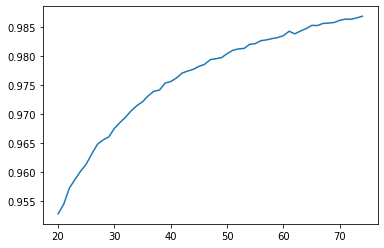

In [ ]:
plt.plot(x_range,y)

## Plot mean of largest order statistics as a function of sample size. Normal distribution.

In [ ]:
def mean_largest_normal(n):
  s = 10000
  mu = 0
  sd = 1
  x = np.random.normal(mu,sd,(n,s))
  xn = np.max(x,axis=0)
  return np.mean(xn)

In [ ]:
x_range = np.arange(50,500,5)
y = [mean_largest_normal(n) for n in x_range]

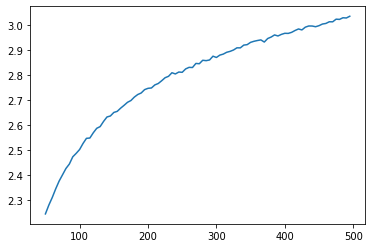

In [ ]:
plt.plot(x_range,y)

In [ ]:
n = 100
s = 10000
mu = 0
sd = 1
x = np.random.normal(0,1,(n,s))
xn = np.max(x,axis=0)

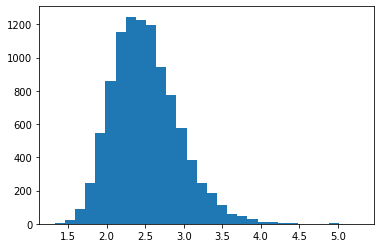

In [ ]:
plt.hist(xn,bins=30)
plt.show()

In [ ]:
#Compare with the theoretical pdf of largest order statistics
z = np.linspace(min(xn),max(xn),num = 200)
fx = n*(norm.cdf(z,mu,sd)**(n-1))*norm.pdf(z,mu,sd)

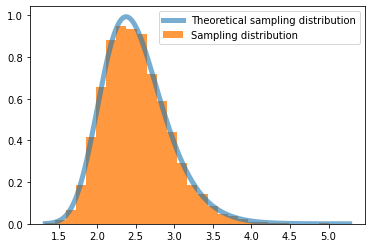

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(z,fx,lw=5, alpha=0.6, label='Theoretical sampling distribution')
ax.hist(xn,bins=30,density=True, histtype='stepfilled', alpha=0.8, label='Sampling distribution')
ax.legend(loc='upper right')
plt.show()